# Machine Learning Pipeline - Model Training

In this notebook, we pick up the transformed datasets and the selected variables that we saved in the previous notebooks.

In [54]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [55]:
# Cargar los conjuntos de entrenamiento y prueba con las variables ingenierizadas
X_train = pd.read_csv('./output/train_feature_engineered.csv')
X_test = pd.read_csv('./output/test_feature_engineered.csv')

# Ver las primeras filas
print(X_train.head())


   model      year  motor_type   running  color  type  status  motor_volume  \
0      0  0.636889           3 -0.600139      1   1.0     3.0     -0.138416   
1      0 -0.274194           3  1.096762     14   1.0     2.0     -0.138416   
2      1  0.788736           3 -0.683320      2   1.0     3.0     -0.138416   
3      0  0.333195           3 -0.488030      2   1.0     3.0     -0.138416   
4      0  0.788736           1 -1.077258      7   1.0     3.0     -0.138416   

      price  
0 -0.011519  
1 -0.973339  
2  0.350906  
3 -0.290307  
4  0.072118  


In [37]:
# Cargar el target (precio de los autos)
y_train = X_train['price']
y_test = X_test['price']

# Eliminar la columna de precio de las características
X_train = X_train.drop('price', axis=1)
X_test = X_test.drop('price', axis=1)

# Ver las primeras filas del target
print(y_train.head())


0   -0.011519
1   -0.973339
2    0.350906
3   -0.290307
4    0.072118
Name: price, dtype: float64


In [60]:
# Configurar el modelo (en este caso RandomForestRegressor)
from sklearn.ensemble import RandomForestRegressor

# Definimos el modelo con los mejores parámetros obtenidos previamente
rf_model = RandomForestRegressor(n_estimators=200, max_depth=8, min_samples_split=10, random_state=42)


In [61]:
# Entrenar el modelo
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=8, min_samples_split=10, n_estimators=200,
                      random_state=42)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Realizar predicciones en el conjunto de entrenamiento
train_pred = rf_model.predict(X_train)

# Calcular MSE, RMSE y R² en el conjunto de entrenamiento
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_pred)

print(f'Train MSE: {train_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Train R²: {train_r2}')


Train MSE: 0.003538076397574942
Train RMSE: 0.059481731628920675
Train R²: 0.9965834908520971


In [63]:
# Realizar predicciones en el conjunto de prueba
test_pred = rf_model.predict(X_test)

# Calcular MSE, RMSE y R² en el conjunto de prueba
test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_pred)

print(f'Test MSE: {test_mse}')
print(f'Test RMSE: {test_rmse}')
print(f'Test R²: {test_r2}')


Test MSE: 0.004571853458995231
Test RMSE: 0.06761548239120409
Test R²: 0.9946534055617731


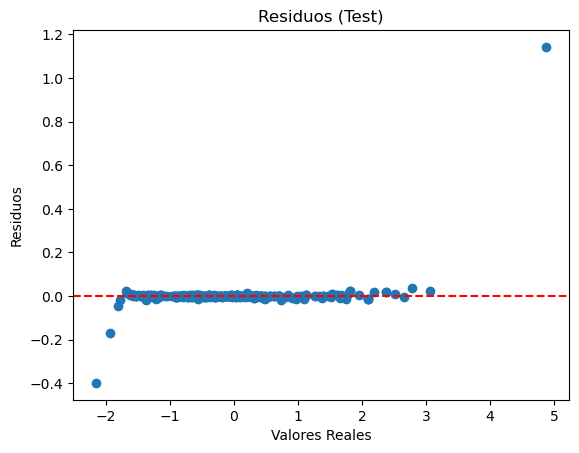

In [64]:
import matplotlib.pyplot as plt

y_test_pred = rf_model.predict(X_test)
plt.scatter(y_test, y_test - y_test_pred)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos (Test)')
plt.xlabel('Valores Reales')
plt.ylabel('Residuos')
plt.show()


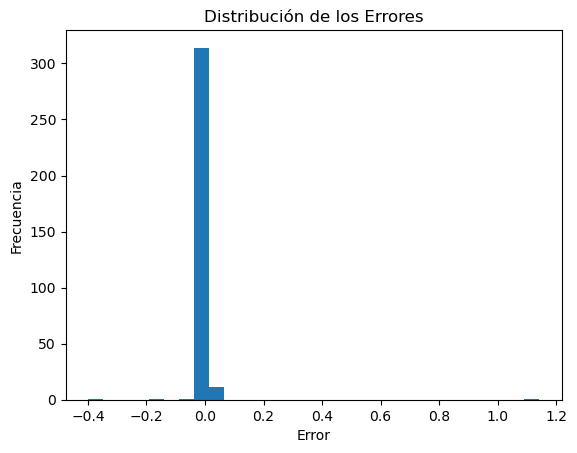

In [65]:
import matplotlib.pyplot as plt

# Calcular los errores
errors = y_test - test_pred

# Graficar la distribución de los errores
plt.hist(errors, bins=30)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores')
plt.show()


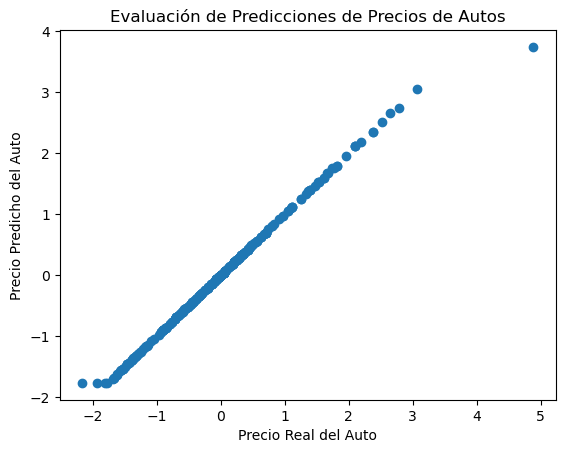

In [66]:
# Comparar las predicciones con los valores reales
plt.scatter(y_test, test_pred)
plt.xlabel('Precio Real del Auto')
plt.ylabel('Precio Predicho del Auto')
plt.title('Evaluación de Predicciones de Precios de Autos')
plt.show()


In [67]:
# Cargar los datos de los archivos CSV
X_train = pd.read_csv('./output/train_feature_engineered.csv')
X_test = pd.read_csv('./output/test_feature_engineered.csv')

# Asegurarse de que el DataFrame de entrenamiento (X_train) contenga la columna 'price' para separar el target
y_train = X_train['price']  # Columna objetivo (target) 'price'
y_test = X_test['price']    # Columna objetivo (target) 'price' en los datos de prueba

# Eliminar la columna 'price' de las características
X_train = X_train.drop('price', axis=1)
X_test = X_test.drop('price', axis=1)

# Manejar valores faltantes (si los hay)
imputer = SimpleImputer(strategy='mean')  # Puedes usar 'median' si lo prefieres
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Inicializar el modelo de regresión lineal
lin_model = LinearRegression()

# Entrenar el modelo
lin_model.fit(X_train, y_train)

# Guardar el modelo entrenado
joblib.dump(lin_model, './Output/linear_regression.joblib')


['./Output/linear_regression.joblib']